# Maximum population growth rate ($r_m$) calculations

In [20]:
###### Population growth rate (r_m) calculations #######

rm(list=ls())
graphics.off()

require('tidyverse')
require('patchwork')
require('cowplot')

Here we first calculate the underlying trait TPCs calculate $r_m$, and then mass-correct it.  

In [21]:
# Create argument containing target species
spps <- "case_when(species == 'Anoplophora glabripennis' ~ '1', 
        species == 'Halyomorpha halys' ~ '2', 
        species == 'Aedes aegypti' ~ '3',
        species == 'Anthonomus grandis' ~ '4',
        species == 'Paracoccus marginatus' ~ '5',
        species == 'Acyrthosiphon pisum' ~ '6',
        species == 'Aphis gossypii' ~ '7',
        species == 'Bemisia tabaci' ~ '8',
        species == 'Tetraneura nigriabdominalis' ~ '9',
        species == 'Stethorus punctillum' ~ '10',
        species == 'Tetranychus mcdanieli' ~ '11',
        species == 'Muscidifurax zaraptor' ~ '12',
        species == 'Aphis nasturtii' ~ '13',
        species == 'Rhopalosiphum maidis' ~ '14',
        species == 'Thrips hawaiiensis' ~ '15',
        species == 'Helicoverpa armigera' ~ '16')"

In [22]:
# Read in the trait data
alpha <- as_tibble(read.csv('../data/AlphaPredictions.csv')) %>% 
  select(species, temp, alpha, alphaLwr, alphaUpr, curve_ID) %>%
  mutate(temp = as.numeric(temp)) %>%
  filter(species == 'Anoplophora glabripennis' |
         species == 'Halyomorpha halys' |
         species == 'Aedes aegypti'|
         species == 'Anthonomus grandis' |
         species == 'Paracoccus marginatus' |
         species == 'Acyrthosiphon pisum' |
         species == 'Aphis gossypii' |
         species == 'Bemisia tabaci' |
         species == 'Tetraneura nigriabdominalis' |
         species == 'Stethorus punctillum' |
         species == 'Tetranychus mcdanieli' |
         species == 'Muscidifurax zaraptor' |
         species == 'Aphis nasturtii' |
         species == 'Rhopalosiphum maidis' |
         species == 'Thrips hawaiiensis' |
         species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  arrange(curve_ID)

#alpha %>% distinct(species, curve_ID) %>% print(n=50)
head(alpha)

species,temp,alpha,alphaLwr,alphaUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,0.00000000,1929.329,2828.022,1410.252,1
Anoplophora glabripennis,0.04504505,1922.721,2815.612,1406.536,1
Anoplophora glabripennis,0.09009009,1916.138,2803.260,1402.833,1
Anoplophora glabripennis,0.13513514,1909.580,2790.967,1399.141,1
Anoplophora glabripennis,0.18018018,1903.046,2778.731,1395.332,1
Anoplophora glabripennis,0.22522523,1896.537,2766.554,1391.587,1


In [23]:
zj  <- as_tibble(read.csv('../data/zjPredictions.csv'))  %>% 
  select(species, temp, zj, zjLwr, zjUpr, curve_ID) %>%
  mutate(temp = as.numeric(temp)) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Acyrthosiphon pisum' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  arrange(curve_ID)

#zj %>% distinct(species, curve_ID) %>% print(n=50)

head(zj)

species,temp,zj,zjLwr,zjUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,0.00000000,0.01945223,0.07795300,0.008517600,1
Anoplophora glabripennis,0.04504505,0.01929008,0.07696744,0.008466916,1
Anoplophora glabripennis,0.09009009,0.01912934,0.07599467,0.008417208,1
Anoplophora glabripennis,0.13513514,0.01896998,0.07503418,0.008367808,1
Anoplophora glabripennis,0.18018018,0.01881200,0.07407778,0.008318714,1
Anoplophora glabripennis,0.22522523,0.01865540,0.07313388,0.008269925,1


In [24]:
z  <- as_tibble(read.csv('../data/zPredictions.csv'))  %>% 
  select(species, temp, z, zLwr, zUpr, curve_ID) %>%
  mutate(temp = as.numeric(temp)) %>%
           filter(species == 'Anoplophora glabripennis' |
                    species == 'Halyomorpha halys' |
                    species == 'Aedes aegypti'|
                    species == 'Anthonomus grandis' |
                    species == 'Paracoccus marginatus' |
                    species == 'Acyrthosiphon pisum' |
                    species == 'Aphis gossypii' |
                    species == 'Bemisia tabaci' |
                    species == 'Tetraneura nigriabdominalis' |
                    species == 'Stethorus punctillum' |
                    species == 'Tetranychus mcdanieli' |
                    species == 'Muscidifurax zaraptor' |
                    species == 'Aphis nasturtii' |
                    species == 'Rhopalosiphum maidis' |
                    species == 'Thrips hawaiiensis' |
                    species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  arrange(curve_ID)
  
#z %>% distinct(species, curve_ID) %>% print(n=50)
         
head(z)

species,temp,z,zLwr,zUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,0.00000000,0.1134038,0.8999417,0.04776084,1
Anoplophora glabripennis,0.04504505,0.1114940,0.8693258,0.04724500,1
Anoplophora glabripennis,0.09009009,0.1096178,0.8397651,0.04673529,1
Anoplophora glabripennis,0.13513514,0.1077748,0.8112228,0.04623164,1
Anoplophora glabripennis,0.18018018,0.1059643,0.7836637,0.04573396,1
Anoplophora glabripennis,0.22522523,0.1041858,0.7558096,0.04524219,1


In [25]:
bmax <- as_tibble(read.csv('../data/BetaPredictions.csv'))  %>% 
  select(species, temp, bmax, bmaxLwr, bmaxUpr, curve_ID) %>%
  mutate(temp = as.numeric(temp)) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Acyrthosiphon pisum' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  arrange(curve_ID)

#bmax %>% distinct(species, curve_ID) %>% print(n=50)


head(bmax)

species,temp,bmax,bmaxLwr,bmaxUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,0.00000000,0.05883476,0.01412563,0.1210430,1
Anoplophora glabripennis,0.04504505,0.05918183,0.01425284,0.1215835,1
Anoplophora glabripennis,0.09009009,0.05953083,0.01438115,0.1221263,1
Anoplophora glabripennis,0.13513514,0.05988177,0.01451057,0.1226713,1
Anoplophora glabripennis,0.18018018,0.06023467,0.01464111,0.1232185,1
Anoplophora glabripennis,0.22522523,0.06058952,0.01477279,0.1237681,1


In [26]:
df1 <- inner_join(alpha,bmax)

df2 <- inner_join(z, zj)

df <-  inner_join(df1, df2)

df <- df %>% mutate(kappa = 0.01)

Joining, by = c("species", "temp", "curve_ID")
Joining, by = c("species", "temp", "curve_ID")
Joining, by = c("species", "temp", "curve_ID")


## Calculate $r_m$ TPCs

In [27]:
# Define parameters

zj    <- df$zj
alpha <- df$alpha
z     <- df$z
bmax  <- df$bmax
k     <- df$kappa

# Calculate rmax
df <- df %>% mutate(rm_opt = (((k+z)*((log(bmax/(k+z)))-(alpha*zj)))/(alpha*(k+z)+1)))

# lower
zj_lwr    <- df$zjLwr
alpha_lwr <- df$alphaLwr
z_lwr     <- df$zLwr
bmax_lwr  <- df$bmaxLwr
k         <- df$kappa

df <- df %>% mutate(rm_optLwr = (((k+z_lwr)*((log(bmax_lwr/(k+z_lwr)))-(alpha_lwr*zj_lwr)))/(alpha_lwr*(k+z_lwr)+1)))

# upper 
zj_upr    <- df$zjUpr
alpha_upr <- df$alphaUpr
z_upr     <- df$zUpr
bmax_upr  <- df$bmaxUpr
k         <- df$kappa

df <- df %>% mutate(rm_optUpr = (((k+z_upr)*((log(bmax_upr/(k+z_upr)))-(alpha_upr*zj_upr)))/(alpha_upr*(k+z_upr)+1)))

write_csv(df, '../results/r_mCalcs.csv')

In [28]:
bodyMass <- as_tibble(read.csv("../data/sizeMeans.csv")) %>%
            rename(species = interactor1, mass = avg, mass_sd = sd) %>%
            mutate(curve_ID = eval(parse(text=spps))) %>%
            filter(curve_ID != 'NA') %>% arrange(curve_ID)

head(bodyMass)


bodyMass <- bodyMass %>% select(species, mass, curve_ID) 

df <- inner_join(df, bodyMass)

write_csv(df, "../results/rm_optSizeScaling.csv")


species,mass,mass_sd,curve_ID
<chr>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,159.8000000,NA,1
Stethorus punctillum,0.4800000,0.0424264069,10
Tetranychus mcdanieli,0.0243000,0.0002828427,11
Muscidifurax zaraptor,0.8950000,0.0932737905,12
Aphis nasturtii,0.8673000,0.3252394195,13
Rhopalosiphum maidis,0.2995714,0.1664730780,14


Joining, by = c("species", "curve_ID")


In [29]:
# truncate data for plotting 

df <- df %>%
  mutate_at(vars(c(rm_opt)), 
            ~ifelse(rm_opt < -0.001, -0.001, .)) %>%
  mutate_at(vars(c(rm_optLwr)), 
            ~ifelse(rm_optLwr < -0.001, -0.001, .)) %>%
  mutate_at(vars(c(rm_optUpr)), 
            ~ifelse(rm_optUpr < -0.001, -0.001, .)) %>%
  filter(rm_opt > -0.001)

In [30]:
head(df)

species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,zLwr,zUpr,zj,zjLwr,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,9.504505,958.3948,1153.032,803.7997,1,0.1952417,0.08477705,0.2950196,0.007869930,0.008911564,0.006829322,0.003538013,0.005795826,0.002518115,0.01,-0.0009855468,-0.001,0.0009729373,159.8
Anoplophora glabripennis,9.549550,955.3291,1148.300,801.8227,1,0.1963171,0.08544341,0.2963142,0.007834876,0.008849693,0.006818757,0.003510675,0.005727978,0.002505001,0.01,-0.0009445085,-0.001,0.0009989305,159.8
Anoplophora glabripennis,9.594595,952.2741,1143.588,799.8512,1,0.1973980,0.08611479,0.2975988,0.007800724,0.008794776,0.006811764,0.003483562,0.005660879,0.002491960,0.01,-0.0009036855,-0.001,0.0010245968,159.8
Anoplophora glabripennis,9.639640,949.2299,1138.868,797.8852,1,0.1984846,0.08679122,0.2988469,0.007767460,0.008743189,0.006814234,0.003456672,0.005594366,0.002476875,0.01,-0.0008630756,-0.001,0.0010514194,159.8
Anoplophora glabripennis,9.684685,946.1964,1134.092,795.9246,1,0.1995768,0.08747276,0.3000999,0.007735071,0.008687726,0.006809435,0.003430002,0.005526587,0.002461866,0.01,-0.0008226763,-0.001,0.0010786750,159.8
Anoplophora glabripennis,9.729730,943.1736,1129.337,793.9029,1,0.2006746,0.08819543,0.3013577,0.007703542,0.008645294,0.006800916,0.003403551,0.005455418,0.002446957,0.01,-0.0007824853,-0.001,0.0011063888,159.8


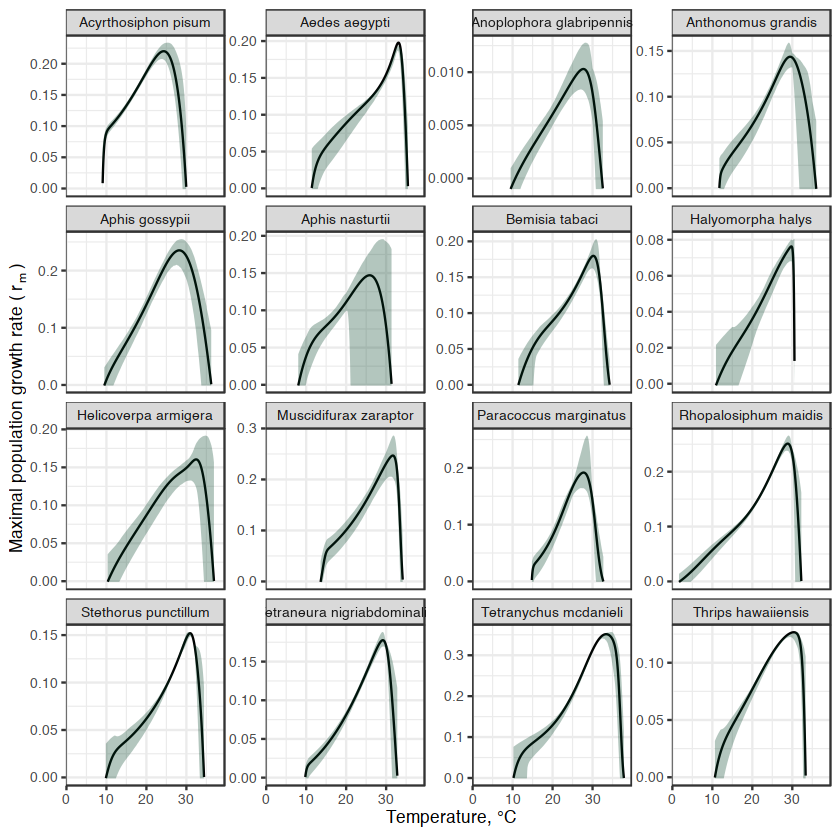

In [31]:
# plot r_m TPCs

rmPlot <- ggplot()+
  geom_line(aes(temp, rm_opt), df)+
  facet_wrap(~species, ncol = 4, scales = "free_y")+
  scale_y_continuous(expression(plain(paste(" Maximal population growth rate ("~italic(r[m])~")"))))+
  theme_bw()+
  geom_ribbon(aes(temp, ymin=rm_optLwr, ymax=rm_optUpr), df, fill="#004225",alpha=0.3)+
  theme(text = element_text(size=10, family='Times'))+
  theme(strip.text = element_text(face = "italic"))+
  labs(x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none')

rmPlot

In [32]:
save_plot(rmPlot, file="../results/SI/rmTPCs.pdf", 
          base_height=15, base_width = 18, base_asp = 1, units="cm")